#Практическое задание: Разработка программ по тематике машинной обработки текстов и глубоких нейросетей для задач NLP

**Цель задания**: Дать вам практический опыт работы с основными инструментами и подходами в обработке естественного языка (NLP), а также позволить вам применить навыки, полученные в течение курса, для решения реальной задачи.

Вашей целью в рамках этого задания будет разработка набора программ, которые используют различные техники NLP для анализа текстового корпуса и решения задач, связанных с NLP.



##Упражнение 1: Подготовка данных

1. Выберите текстовый корпус для анализа. Это может быть любой большой набор текстов на ваш выбор - например, набор твитов, статей из википедии, обзоров книг и т.д.
2. Примените процесс токенизации и нормализации к вашему корпусу текста. Сохраните результаты в подходящем формате для дальнейшего анализа.

In [ ]:
import nltk
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Загрузка текстового корпуса
nltk.download('reuters')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Выбор текстового корпуса
corpus = reuters.raw(categories='crude')

# Токенизация и нормализация
sentences = sent_tokenize(corpus)
word_tokens = [word_tokenize(sentence) for sentence in sentences]

# Удаление стоп-слов и знаков препинания, лемматизация
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
normalized_tokens = []
for sentence in word_tokens:
    normalized_sentence = [lemmatizer.lemmatize(word.lower()) for word in sentence if word not in stop_words and word not in string.punctuation]
    normalized_tokens.append(normalized_sentence)

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Упражнение 2: Анализ текста

1. Реализуйте функцию для подсчета частоты слов в корпусе.
2. Постройте график частоты слов и найдите наиболее часто встречающиеся слова.
3. Реализуйте функцию для поиска N-грамм в тексте и постройте график самых распространенных N-грамм.


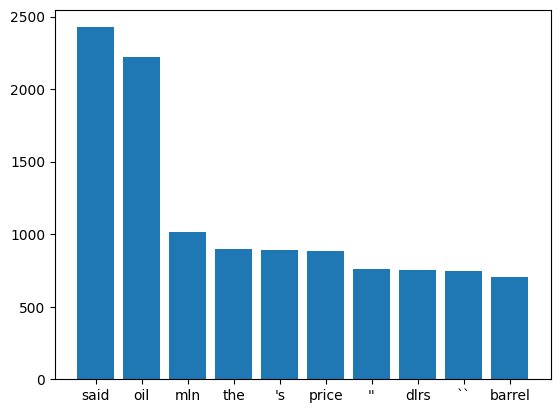

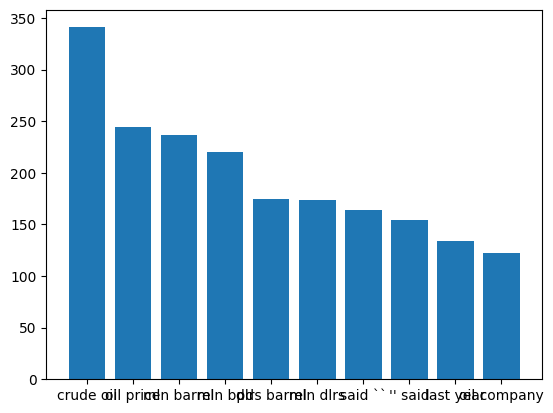

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Подсчет частоты слов
word_freq = Counter([word for sentence in normalized_tokens for word in sentence])

# Построение графика частоты слов
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.show()

# Поиск N-грамм в тексте
ngrams = list(nltk.ngrams([word for sentence in normalized_tokens for word in sentence], 2))
ngram_freq = Counter(ngrams)

# Построение графика самых распространенных N-грамм
most_common_ngrams = ngram_freq.most_common(10)
ngrams, counts = zip(*most_common_ngrams)
plt.bar([' '.join(ngram) for ngram in ngrams], counts)
plt.show()

##Упражнение 3: Использование Word2Vec

1. Используйте библиотеку gensim для обучения Word2Vec модели на вашем корпусе текста.
2. Проведите несколько примеров использования модели - поиск наиболее похожих слов, аналогии и т.д.


In [ ]:
from gensim.models import Word2Vec

# Обучение Word2Vec модели
model = Word2Vec(normalized_tokens, min_count=1)

# Поиск наиболее похожих слов
print(model.wv.most_similar('oil'))

# Аналогии
print(model.wv.most_similar(positive=['company', 'crude'], negative=['man']))

[('increase', 0.9993941187858582), ('contract', 0.9993667602539062), ('light', 0.9992947578430176), ('much', 0.9992744326591492), ('lower', 0.9992604851722717), ('today', 0.9992527961730957), ('heavy', 0.9992431998252869), ('product', 0.9992415904998779), ('import', 0.9992185235023499), ('domestic', 0.9992151856422424)]
[('slipped', 0.8834284543991089), ('former', 0.8834168314933777), ('improving', 0.8808245658874512), ('worked', 0.880307674407959), ('event', 0.8799113035202026), ('moment', 0.8788613677024841), ('wood', 0.8785723447799683), ('ease', 0.8775420784950256), ('renewed', 0.87721186876297), ('drew', 0.8771730065345764)]


##Упражнение 4: Использование предобученных моделей

1. Выберите предобученную модель NLP (BERT, GPT-2 и т.д.) и используйте ее для анализа вашего корпуса текста. Например, вы можете использовать модель для классификации текстов или генерации нового текста.
2. Оцените результаты и обсудите возможные проблемы и ограничения использования этих моделей.


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.5 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Загрузка предобученной модели и токенизатора
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Классификация текста
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)  # класс 1
outputs = model(**inputs, labels=labels)
loss = outputs.loss
logits = outputs.logits

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Упражнение 5: Создание и обучение своей модели

1. Разработайте и обучите свою собственную модель NLP для решения задачи связанной с вашим корпусом текста. Это может быть классификация текста, генерация текста, машинный перевод или любая другая задача NLP на ваш выбор.
2. Оцените результаты, сравните их с результатами предобученных моделей.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(sentence) for sentence in normalized_tokens])

# Создание меток (в этом примере все тексты относятся к одному классу)
y = [0 for _ in range(X.shape[0])]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Оценка модели
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0
